## IMPORTING LIBRARIES

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## IMPORTING DATA SET

In [104]:
import os
os.chdir("C:\\Users\\benwi\\Downloads\\ML-PROJECT\\CAR-Price")

#Read the cars.csv data
import pandas as pd
df = pd.read_csv("car data.csv")

In [105]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [106]:
df.shape

(301, 9)

In [107]:
df.info()                                 #data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [108]:
df.describe()                               #descriptive data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### To check whether features has any missing values

In [110]:
df.isnull().sum()                     

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### There is no null values present in the features columns

## EXPLORATORY DATA ANALYSIS

In [124]:
df.head(10)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
5,vitara brezza,9.25,9.83,2071,Diesel,Dealer,Manual,0,4
6,ciaz,6.75,8.12,18796,Petrol,Dealer,Manual,0,7
7,s cross,6.50,8.61,33429,Diesel,Dealer,Manual,0,7
8,ciaz,8.75,8.89,20273,Diesel,Dealer,Manual,0,6
9,ciaz,7.45,8.92,42367,Diesel,Dealer,Manual,0,7


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

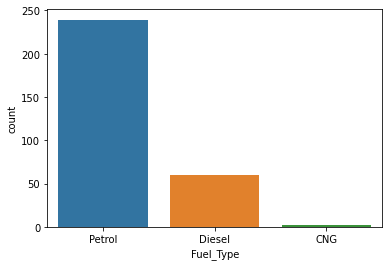

In [116]:
import seaborn as sns
sns.countplot(x="Fuel_Type", data=df)

Observation: Majority of the vehicles are either petrol vehicle or diesel vehicle

<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

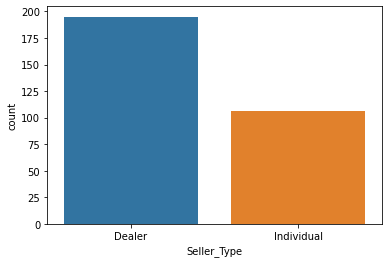

In [125]:
sns.countplot(x="Seller_Type", data=df)

Observation: Dealer seller is the largest seller type

<AxesSubplot:xlabel='Transmission', ylabel='count'>

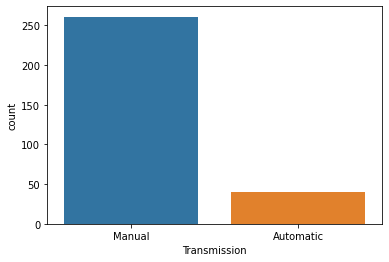

In [126]:
sns.countplot(x="Transmission", data=df)

Observation: Majority of the vehicles transmissions is Manual

<AxesSubplot:xlabel='Owner', ylabel='count'>

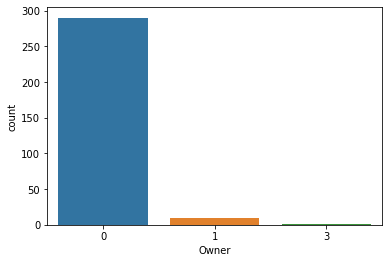

In [127]:
sns.countplot(x="Owner", data=df)

Observation: First owner is the largest owner type

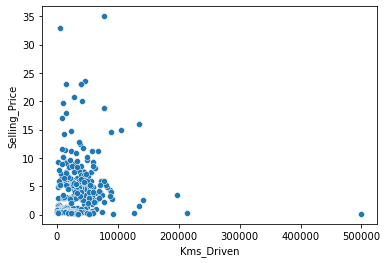

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = df, x = "Kms_Driven", y = "Selling_Price")
plt.show()

Observation: selling_price and km_driven are inversely proportional

### Encoding the Categorical Data

In [130]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [132]:
df.head(10)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,3.35,5.59,27000,0,0,0,0,8
1,sx4,4.75,9.54,43000,1,0,0,0,9
2,ciaz,7.25,9.85,6900,0,0,0,0,5
3,wagon r,2.85,4.15,5200,0,0,0,0,11
4,swift,4.60,6.87,42450,1,0,0,0,8
5,vitara brezza,9.25,9.83,2071,1,0,0,0,4
6,ciaz,6.75,8.12,18796,0,0,0,0,7
7,s cross,6.50,8.61,33429,1,0,0,0,7
8,ciaz,8.75,8.89,20273,1,0,0,0,6
9,ciaz,7.45,8.92,42367,1,0,0,0,7


<AxesSubplot:>

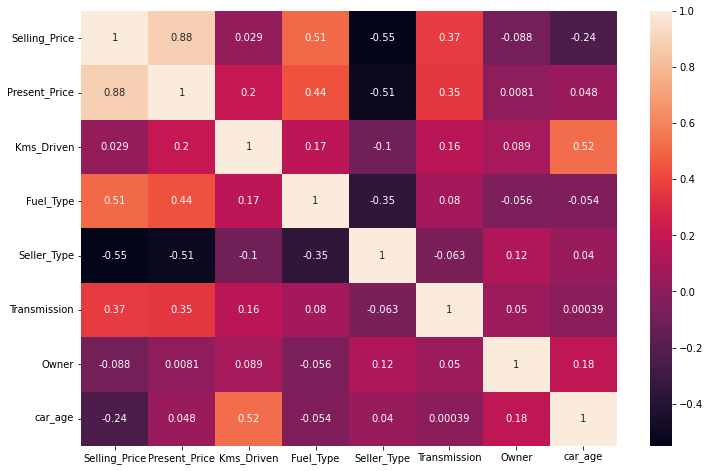

In [133]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True)

Observations
- Selling Price and Km Driven: High Inverse Correlation
- Selling Price and Owner: High Inverse Correlation
- Selling Price and Car age: High Inverse Correlation

### Splitting the data and Target

In [135]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [136]:
print(X)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          0            0             0      0   
1             9.54       43000          1            0             0      0   
2             9.85        6900          0            0             0      0   
3             4.15        5200          0            0             0      0   
4             6.87       42450          1            0             0      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            0             0      0   
297           5.90       60000          0            0             0      0   
298          11.00       87934          0            0             0      0   
299          12.50        9000          1            0             0      0   
300           5.90        5464          0            0             0      0   

     car_age  
0          8  
1          9  
2     

In [137]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [157]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=15)

## TRAINING MODEL
###  Linear Regression

In [158]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,Y_train)
print(lin_reg_model.score(X_train,Y_train))
print(lin_reg_model.score(X_test,Y_test))

0.8827680404583987
0.8297069500961587


### Decission Tree Regression

In [151]:
from sklearn.tree import DecisionTreeRegressor
dec_reg=DecisionTreeRegressor(max_depth=5)
dec_reg

DecisionTreeRegressor(max_depth=5)

In [152]:
dec_reg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5)

In [153]:
y_pred_dec_reg=dec_reg.predict(X_train)
print(y_pred_dec_reg)

[18.25        4.67222222  9.836       0.56741935  5.84636364  2.83181818
  3.075       1.10913043  4.67222222  4.67222222  0.56741935  4.67222222
  0.33451613 14.49        2.85714286  0.33451613  4.67222222  6.39166667
  1.10913043  0.56741935  6.39166667  0.56741935 11.40833333  4.67222222
  2.83181818  9.836       1.10913043  7.7076     11.40833333  2.11
  0.33451613  1.6375      4.6875      4.67222222  3.075       2.85714286
  0.33451613  3.075       4.67222222  4.67222222  4.67222222  7.7076
  1.10913043  4.67222222  1.10913043  0.56741935  4.6875     11.40833333
  5.2375      2.85714286  0.56741935  0.56741935  4.67222222  6.39166667
  4.67222222 14.49        5.62916667  7.7076      5.2375      0.33451613
  7.7076      0.33451613  0.33451613  4.67222222  9.836       4.67222222
  5.62916667  4.67222222  1.10913043  2.83181818  2.83181818  0.33451613
  1.6375      1.10913043  7.7076      0.33451613  0.33451613  0.56741935
  3.4625      5.2375      0.56741935  4.67222222  2.83181818 

In [154]:
print("Score on Test Data : ",dec_reg.score(X_test,Y_test))
print("Score on Training Data : ",dec_reg.score(X_train,Y_train))

Score on Test Data :  0.9034700573253561
Score on Training Data :  0.9839284154391448
